# Dados do observatório Brasileiro do Cinema

https://oca.ancine.gov.br/cinema

In [51]:
#importacao das bibliotecas
import pandas as pd
import datetime as dt
%matplotlib inline

In [118]:
df = pd.read_csv(
    r'2121.csv',
    thousands='.',
    decimal=',',
    na_values='0',
    encoding='latin_1',
    sep=';',
    skip_blank_lines=True,
    skiprows=2,
    skipfooter=22,
    usecols=range(0, 13),
    engine='python'
)
df.head()

,Ano de Lançamento,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Empresa distribuidora,Origem da empresa distribuidora,Salas no Lançamento,Máximo de Salas Ocupadas,Público acumulado,Renda (R$) acumulada
0,2009,1983.. O Ano Azul,B0901024500000,Documentário,Brasil,Brasileira,5/6/2009,Prana Filmes,Distribuição Nacional,2,2,2313,23001.98
1,2009,23 Anos em 7 Segundos: 1977 - O Fim do Jejum C...,B0901028800000,Documentário,Brasil,Brasileira,26/6/2009,Fox,Distribuição Internacional,7,7,1718,14936.00
2,2009,A Erva do Rato,B0900982500000,Ficção,Brasil,Brasileira,26/6/2009,República Pureza,Distribuição Nacional,1,3,3546,31690.00
3,2009,A Festa da Menina Morta,B0800866000000,Ficção,Brasil,Brasileira,11/6/2009,Imovision,Distribuição Nacional,6,14,16414,131091.30
4,2009,A Ilha da Morte,B0700701800000,Ficção,Brasil,Brasileira,8/5/2009,Imovision,Distribuição Nacional,3,4,2177,23390.93


In [102]:
df.tail()

,Ano de Lançamento,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Empresa distribuidora,Origem da empresa distribuidora,Salas no Lançamento,Máximo de Salas Ocupadas,Público acumulado,Renda (R$) acumulada
4360,2019,X-Men: Fênix Negra,E1900131400000,Ficção,Estados Unidos,Estrangeira,6/6/2019,Fox,Distribuição Internacional,1284,1284,3330607,54347798
4361,2019,Yara,E1800586300000,Ficção,"França, Iraque, Líbano",Estrangeira,10/1/2019,Zeta Filmes,Distribuição Nacional,7,7,2327,25702
4362,2019,Yesterday,E1900265700000,Ficção,Reino Unido,Estrangeira,29/8/2019,Universal,Distribuição Internacional,501,501,624607,12078909
4363,2019,Yomeddine,E1800495100000,Ficção,"Áustria, Egito, Estados Unidos",Estrangeira,7/3/2019,Imovision,Distribuição Nacional,5,5,2110,37318
4364,2019,Zumbilândia: Atire Duas Vezes,E1900367100000,Ficção,Estados Unidos,Estrangeira,24/10/2019,Sony,Distribuição Internacional,468,468,287152,4185690


In [104]:
# Tipos das colunas
df.dtypes

Ano de Lançamento                   int64
Título da obra                     object
CPB/ROE                            object
Gênero                             object
País(es) produtor(es) da obra      object
Nacionalidade da obra              object
Data de lançamento                 object
Empresa distribuidora              object
Origem da empresa distribuidora    object
Salas no Lançamento                object
Máximo de Salas Ocupadas           object
Público acumulado                  object
Renda (R$) acumulada               object
dtype: object

In [121]:
# Converter campos
df_novo = df.copy()
df_novo['Data de lançamento'] = pd.to_datetime(df_novo['Data de lançamento'], format='%d/%m/%Y')
df_novo['Renda (R$) acumulada'] = df_novo['Renda (R$) acumulada'].str.replace('ND', '0')
df_novo['Renda (R$) acumulada'] = df_novo['Renda (R$) acumulada'].astype(float)

In [122]:
df_novo['Data de lançamento'].dt.strftime('%Y').value_counts()

2018    472
2017    463
2016    459
2015    454
2019    444
2013    397
2014    393
2011    334
2012    326
2009    317
2010    306
Name: Data de lançamento, dtype: int64

<AxesSubplot:>

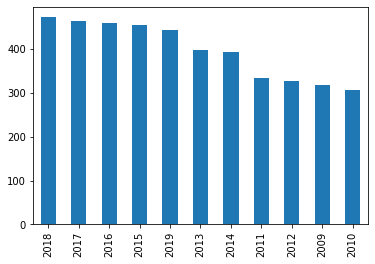

In [123]:
df_novo['Data de lançamento'].dt.strftime('%Y').value_counts().plot.bar()

In [125]:
# Qual o filme de maior bilheteria
df_novo.loc[df_novo['Renda (R$) acumulada'].idxmax()]

Ano de Lançamento                                        2019
Título da obra                           Vingadores: Ultimato
CPB/ROE                                        E1900107800000
Gênero                                                 Ficção
País(es) produtor(es) da obra                  Estados Unidos
Nacionalidade da obra                             Estrangeira
Data de lançamento                        2019-04-25 00:00:00
Empresa distribuidora                                  Disney
Origem da empresa distribuidora    Distribuição Internacional
Salas no Lançamento                                      3139
Máximo de Salas Ocupadas                                 3139
Público acumulado                                    19656467
Renda (R$) acumulada                              338624881.0
Name: 4353, dtype: object

In [126]:
# Os tres filmes com maior bilheteria
df_novo.nlargest(3, 'Renda (R$) acumulada')

,Ano de Lançamento,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Empresa distribuidora,Origem da empresa distribuidora,Salas no Lançamento,Máximo de Salas Ocupadas,Público acumulado,Renda (R$) acumulada
4353,2019,Vingadores: Ultimato,E1900107800000,Ficção,Estados Unidos,Estrangeira,2019-04-25,Disney,Distribuição Internacional,3139,3139,19656467,338624881.0
4276,2019,O Rei Leão,E1900267700000,Ficção,Estados Unidos,Estrangeira,2019-07-18,Disney,Distribuição Internacional,2305,2305,16242804,265786968.0
3911,2018,Vingadores: Guerra Infinita,E1800067100000,Ficção,Estados Unidos,Estrangeira,2018-04-26,Disney,Distribuição Internacional,2381,2381,14502151,238029913.0


In [128]:
# Os filmes de menor renda
df_novo[df_novo['Renda (R$) acumulada'] <= df_novo['Renda (R$) acumulada'].min()]

,Ano de Lançamento,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Empresa distribuidora,Origem da empresa distribuidora,Salas no Lançamento,Máximo de Salas Ocupadas,Público acumulado,Renda (R$) acumulada
48,2009,Naufrágio - Mistério e Morte na Catástrofe do ...,B1101495000000,Documentário,Brasil,Brasileira,2009-12-25,Master Shot Produções,Distribuição Nacional,ND,NaN,ND,0.0
76,2009,"Vamos Subir, Leão",Sem CPB,Documentário,Brasil,Brasileira,2009-03-20,Canal 3,Distribuição Nacional,ND,ND,ND,0.0
355,2010,Luto Como Mãe,B1101395900000,Documentário,Brasil,Brasileira,2010-08-20,TV Zero Cinema,Distribuição Nacional,ND,NaN,ND,0.0
627,2011,A Última Estrada da Praia,B1101383500000,Ficção,Brasil,Brasileira,2011-09-16,Okna Produções,Distribuição Nacional,ND,NaN,ND,0.0
696,2011,Porta a porta  A política em dois tempos,B1101435200000,Documentário,Brasil,Brasileira,2011-12-02,Zéfiro Produções,Distribuição Nacional,ND,NaN,ND,0.0
891,2011,Poema de Salvação,E1600211700000,Ficção,Argentina,Estrangeira,2011-09-30,Canzión filmes,Distribuição Nacional,ND,ND,ND,0.0
971,2012,Clementina de Jesus - Rainha Quelé,B1201641300000,Documentário,Brasil,Brasileira,2012-11-15,Werinton Kermes,Distribuição Nacional,ND,ND,ND,0.0
999,2012,Luto em Luta,B1201650700000,Documentário,Brasil,Brasileira,2012-09-21,Like Filmes,Distribuição Nacional,ND,NaN,ND,0.0
1018,2012,Ponto Org,B1201566400000,Ficção,Brasil,Brasileira,2012-09-21,Usina Digital,Distribuição Nacional,ND,ND,ND,0.0
1183,2012,Movimento Browniano,Sem ROE,Ficção,Holanda,Estrangeira,2012-07-06,Petrini,Distribuição Nacional,ND,ND,ND,0.0


In [134]:
# Quantidade de filmes estrangeiros e nacionais
df_novo['Nacionalidade da obra'].value_counts()

Estrangeira    2996
Brasileira     1369
Name: Nacionalidade da obra, dtype: int64

In [135]:
pd.value_counts??